## EE-361M Introduction to Data Mining
## Assignment #3
## Due: Thursday, Mar 4, 2016 by midnight; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

## Question 1 (2+1 = 3 points)

View the video at:

https://www.youtube.com/watch?v=jbkSRLYSojo

(Hans Rosling's 200 Countries, 200 Years, 4 Minutes) and answer the following questions:

1. How many variables are being visualized in the “moving bubble plots” video (list them)?

2. Identify a variable that is “zoomed into”, i.e., examined at a sub-category or more detailed level.


FACTOID: Rosling’s gapminder visualization

(see https://www.youtube.com/user/Gapcast for some more insightful videos) can now be

readily used by you via Google Charts: https://developers.google.com/chart/interactive/docs/gallery

Just plug in your own variables into “Bubble Chart” under the URL above and go!

## Question 2 (3+3+2+2=10 points)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The dataset is prostate cancer data. The data can be found on canvas on the homework 3 page as prostate.csv. More information on the data can be found [here](https://cran.r-project.org/web/packages/ElemStatLearn/ElemStatLearn.pdf) under prostate. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). We will be using all the variables to predict lcavol. 

1. Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter lambda (Note: lambda is called alpha in sklearn), use [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100]  for ridge and [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] for lasso. Report the best chosen based on cross-validation. The cross validation should happen on your training data using  average MSE as the scoring metric.
2. Run ridge and lasso for all of the parameters specified above (on all training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 
3. Run least squares regression, ridge, and lasso on the full training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error on the test data for each.
4. For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.


Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05000, score: 0.30258
[fold 1] alpha: 0.20000, score: 0.64999
[fold 2] alpha: 0.05000, score: -0.05373
[fold 3] alpha: 0.01000, score: 0.57738
[fold 4] alpha: 0.05000, score: 0.72075

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


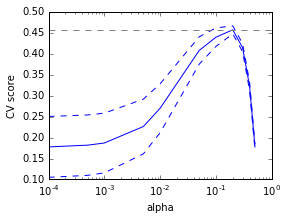

In [84]:
import csv
with open('prostate.csv', 'r') as f1:
    next(f1)
    reader = csv.reader(f1, delimiter=',')
    input_set = []   
    for row in reader:
        input_set.append(row)

import numpy as np 
from numpy import genfromtxt
from sklearn import cross_validation, datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline 

train, intermediate_set = cross_validation.train_test_split(input_set, test_size=0.33, random_state=42)
#cv, test = cross_validation.train_test_split(intermediate_set, train_size=0.5, test_size=0.5)

diabetes = datasets.load_diabetes()
Y = diabetes.data[:150]
z = diabetes.target[:150]

#print Y
#print len(train)
#print len(intermediate_set)

lasso = linear_model.Lasso()
alphas = (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5)

otherdata = list()
lcavol = list()
for i in range(len(train)):
    lcavol.append(float(train[i][0]))
    otherdata.append((train[i][1:]))
T2 = [map(float, x) for x in otherdata]    
y = lcavol 
X = np.array(T2)
y = np.array(y)

scores = list()
scores_std = list()


for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, X, y, n_jobs=1.0)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))    
    

plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

lasso_cv = linear_model.LassoCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 5)

print "Answer to the bonus question:", "how much can you trust the selection of alpha?"
print
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 10.00000, score: 0.26421
[fold 1] alpha: 10.00000, score: 0.69243
[fold 2] alpha: 5.00000, score: -0.06701
[fold 3] alpha: 10.00000, score: 0.53314
[fold 4] alpha: 10.00000, score: 0.72717

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


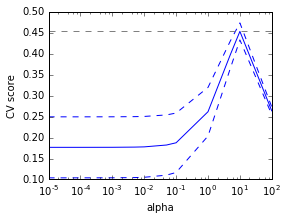

In [85]:
ridge = linear_model.Ridge()
alphas2 = (0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100)
scores2 = list()
scores_std2 = list()

for alpha in alphas2:
    ridge.alpha = alpha
    this_scores2 = cross_validation.cross_val_score(ridge, X, y, n_jobs=1.0)
    scores2.append(np.mean(this_scores2))
    scores_std2.append(np.std(this_scores2))

plt.figure(figsize=(4, 3))
plt.semilogx(alphas2, scores2)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas2, np.array(scores2) + np.array(scores_std2) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas2, np.array(scores2) - np.array(scores_std2) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores2), linestyle='--', color='.5')

ridge_cv = linear_model.RidgeCV(alphas=alphas2)
k_fold = cross_validation.KFold(len(X), 5)

print "Answer to the bonus question:", "how much can you trust the selection of alpha?"
print
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold):
    ridge_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, ridge_cv.alpha_, ridge_cv.score(X[test], y[test])))
print
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

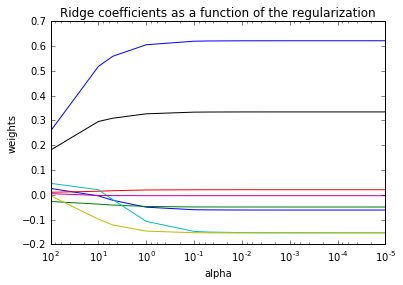

In [91]:
#n_alphas = 200
#alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas2:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
#plt.axis('tight')
plt.show()

## Question 3 (3+3+2+2 = 10 points)

Re-solve all the questions in question 2 using R. You can submit the code and results via a PDF or other format. Just please make a reference to it in your notebook. See hints.R on the Canvas homework 3 page to help get you started. I would recommend using [RStudio](https://www.rstudio.com/products/rstudio/download/) for your work in R.

## Question 4 (5+5 = 10 points)

1. Derive the coefficent updates, from first principles, for a gradient descent version of linear regression. Hint: start from the cost function. If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for a gradient descent version of linear regression. Should be similar to sklearn in that you have a fit function that takes an X, y, learning rate, and number of iterations and a predict funtion that takes an X value. Use your new SGD regression to re-run question 2.4 and compare MSE. Make sure you always normalize your X matrices and use an intercept. You can also compare your results with SGDRegressor from sklearn, but not required.

## Question 5 (2+1+5+2 = 10 points)

We will use Google's Tensorflow to create a simple multi-layered perceptron. Installation instructions can be found [here](https://www.tensorflow.org/versions/r0.7/get_started/os_setup.html#pip-installation). To make our lives even easier, we will be using [skflow](https://github.com/tensorflow/skflow). This can be installed via pip install skflow. This is a higher level API on top of tensorflow. You can find documentation on how to get started on the skflow page.

To install tensorflow, this command should work (did on Mac):

sudo pip install --upgrade https://storage.googleapis.com/tensorflow/mac/tensorflow-0.7.0-py2-none-any.whl --ignore-installed

1. Use pandas to get spam classification [data](https://archive.ics.uci.edu/ml/datasets/Spambase) from UCI. Don't worry about getting the column names. The last column is a 1 if spam, zero otherwise.
2. Split the data into training and testing using test_size=0.33, random_state=42.
3. Use a TensorFlowDNNClassifier to classify whether an email is spam and report your testing accuracy. You should use 1 hidden layer with 5 units, 50,000 steps, and a learning rate of .05. What does each parameter do and why does it matter?
4. Compare your accuracy to a logistic regression using sklean. Discuss why one may have performed better than the other. You may also experiment with the architecture of your neural network (i.e. the number of hidden units, the number of nodes, the number of steps, and the learning rate) to see if you can improve your results from part 3.

In [124]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import sklearn.metrics
import skflow

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
#print df[57][0]

training, testing = train_test_split(df, test_size=0.33, random_state=42)
print len(training)
print len(testing)

X = df.values[:,:57]
y = df.values[:,57]

model_classification = skflow.TensorFlowDNNClassifier(
        hidden_units  = [5],
        n_classes     = 2,
        learning_rate = 0.05,
        steps         = 50000
    )

#import skflow
#from sklearn import datasets, metrics

#iris = datasets.load_iris()
#classifier = skflow.TensorFlowDNNClassifier(hidden_units=[10, 20, 10], n_classes=3)
#classifier.fit(X_train, y_train)
#predicted = classified.predict(X-test) keep
#score = metrics.accuracy_score(y_test, predicted) keep
#score = metrics.accuracy_score(iris.target, classifier.predict(iris.data))
#print("Accuracy: %f" % score)

ImportError: No module named tensorflow